In [ ]:
!pip install pandas openpyxl
!pip install --upgrade gspread
!pip install google-auth google-auth-oauthlib google-auth-httplib2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [ ]:
from google.colab import files, data_table, drive, auth
auth.authenticate_user()
drive.mount('/content/drive')
import gspread
from google.auth import default
credits, _ = default()
gc = gspread.authorize(credits)

import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
import requests
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

Mounted at /content/drive


In [ ]:
# Specify the file path
file_path = 'https://docs.google.com/spreadsheets/d/1sj2M7jWgVtHeCyvAnmBPV6iw-oWzTdtyriMfzUPMW-I/edit?gid=173496065#gid=173496065'

# Extract the spreadsheet ID from the URL
spreadsheet_id = file_path.split('/d/')[1].split('/edit')[0]
sh = gc.open_by_key(spreadsheet_id)
worksheet = []
stock_portfolio_df = []
i = 0
# Select the worksheet (by title or index)
for i in range(6):
  worksheet.append(sh.get_worksheet(i))
  # Load the Excel file into a DataFrame
  stock_portfolio_data = worksheet[i].get_all_values()

  stock_portfolio_df.append(pd.DataFrame(stock_portfolio_data[1:], columns=stock_portfolio_data[i]))

stock_portfolio_df_cleaned = stock_portfolio_df[:-2]
len(stock_portfolio_df_cleaned)
stock_portfolio_df_cleaned = stock_portfolio_df_cleaned[0]
stock_portfolio_df_cleaned

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,1,1.000,0.000,0.000,0.000,0.000,0.000,1.95%,1.34%,1.902607858,21.86%,60.00%,40.00%,0.488,0.609,0.781,0.800,0.680,0.333
1,2,0.000,1.000,0.000,0.000,0.000,0.000,2.38%,0.64%,1.26328667,12.87%,55.00%,65.00%,0.505,0.508,0.444,0.414,0.560,0.667
2,3,0.000,0.000,1.000,0.000,0.000,0.000,8.03%,2.65%,1.894339115,20.83%,55.00%,50.00%,0.728,0.800,0.776,0.756,0.560,0.467
3,4,0.000,0.000,0.000,1.000,0.000,0.000,-0.67%,0.07%,1.425453672,15.55%,55.00%,35.00%,0.385,0.426,0.529,0.529,0.560,0.267
4,5,0.000,0.000,0.000,0.000,1.000,0.000,2.20%,0.44%,1.094578724,10.67%,65.00%,70.00%,0.498,0.479,0.355,0.320,0.800,0.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200,3.47%,0.74%,1.010770576,10.08%,55.00%,65.00%,0.548,0.522,0.311,0.294,0.560,0.667
59,60,0.200,0.200,0.000,0.200,0.200,0.200,3.37%,0.68%,0.9184444854,9.20%,60.00%,60.00%,0.544,0.514,0.262,0.257,0.680,0.600
60,61,0.200,0.000,0.200,0.200,0.200,0.200,4.49%,1.04%,1.162878127,11.82%,55.00%,50.00%,0.588,0.566,0.391,0.369,0.560,0.467
61,62,0.000,0.200,0.200,0.200,0.200,0.200,4.05%,0.88%,0.998392017,10.06%,60.00%,65.00%,0.571,0.542,0.304,0.293,0.680,0.667


The dataset contains 64 rows and 19 columns, capturing data on stock performance and investment indicators. Key columns include the weight of stock-picking concepts (e.g., "Large B/P" and "Large ROE").The dataset includes both qualitative (stock-picking concepts) and quantitative (returns, risks) data, providing a comprehensive overview of portfolio performance for the specified period. The data appears structured but may need cleaning for effective analysis.


#Data Preprocessing

In [ ]:
#Drop the duplicates and rename column name
stock_portfolio_df_cleaned = stock_portfolio_df_cleaned.loc[:, ~stock_portfolio_df_cleaned.columns.duplicated()]
stock_portfolio_rename_col = {
    'Annual Return' : 'Annual Return(%)',
    'Excess Return' : 'Excess Return(%)',
    'Total Risk' : 'Total Risk(%)',
    'Abs. Win Rate': 'Abs. Win Rate(%)',
    'Rel. Win Rate' : 'Rel. Win Rate(%)',
}
stock_portfolio_df_cleaned.rename(columns = stock_portfolio_rename_col, inplace = True)
stock_portfolio_df_cleaned.head()

#Exclude % sign with values
stock_portfolio_df_cleaned = stock_portfolio_df_cleaned.replace('%', '', regex=True)
stock_portfolio_df_cleaned.head(15)

<ipython-input-11-99a840ccd6c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_portfolio_df_cleaned.rename(columns = stock_portfolio_rename_col, inplace = True)


,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return(%),Excess Return(%),Systematic Risk,Total Risk(%),Abs. Win Rate(%),Rel. Win Rate(%)
0,1,1.000,0.000,0.000,0.000,0.000,0.000,1.95,1.34,1.902607858,21.86,60.00,40.00
1,2,0.000,1.000,0.000,0.000,0.000,0.000,2.38,0.64,1.26328667,12.87,55.00,65.00
2,3,0.000,0.000,1.000,0.000,0.000,0.000,8.03,2.65,1.894339115,20.83,55.00,50.00
3,4,0.000,0.000,0.000,1.000,0.000,0.000,-0.67,0.07,1.425453672,15.55,55.00,35.00
4,5,0.000,0.000,0.000,0.000,1.000,0.000,2.20,0.44,1.094578724,10.67,65.00,70.00
5,6,0.000,0.000,0.000,0.000,0.000,1.000,-5.34,-1.49,0.8599948142,8.89,40.00,30.00
6,7,0.500,0.500,0.000,0.000,0.000,0.000,6.19,1.63,1.392192441,14.41,55.00,65.00
7,8,0.500,0.000,0.500,0.000,0.000,0.000,6.17,2.34,1.939118385,21.82,60.00,50.00
8,9,0.000,0.500,0.500,0.000,0.000,0.000,7.82,1.97,1.354461574,13.77,55.00,70.00
9,10,0.500,0.000,0.000,0.500,0.000,0.000,6.85,1.90,1.524957345,16.28,55.00,40.00


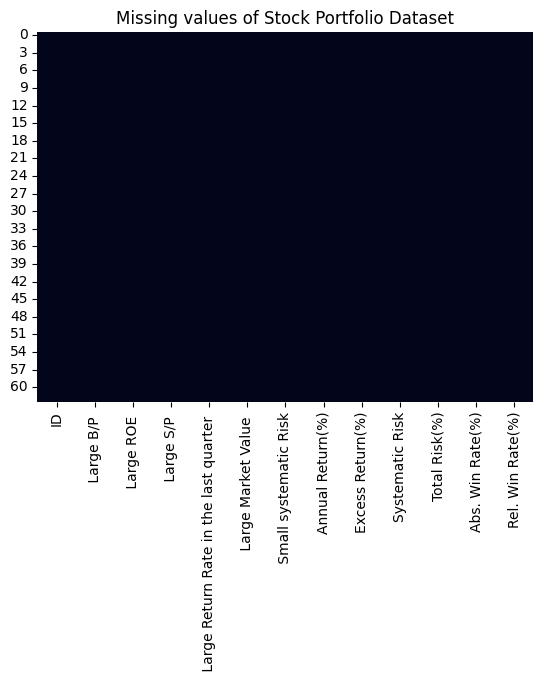

Missing Values Attribute with colimn name:
ID                                         0
 Large B/P                                 0
 Large ROE                                 0
 Large S/P                                 0
 Large Return Rate in the last quarter     0
 Large Market Value                        0
 Small systematic Risk                     0
Annual Return(%)                           0
Excess Return(%)                           0
Systematic Risk                            0
Total Risk(%)                              0
Abs. Win Rate(%)                           0
Rel. Win Rate(%)                           0
dtype: int64


In [ ]:
#Check missing values
sns.heatmap(stock_portfolio_df_cleaned.isnull(), cbar=False)
plt.title('Missing values of Stock Portfolio Dataset')
plt.show()

missing_values = stock_portfolio_df_cleaned.isnull().sum()

print("Missing Values Attribute with colimn name:")
print(missing_values)

In [ ]:
#Check Unique, unnecessary characters in each column
unique_val = stock_portfolio_df_cleaned.nunique()
print("Unique Values Attribute with column name:")
print(unique_val)

Unique Values Attribute with column name:
ID                                         63
 Large B/P                                  7
 Large ROE                                  7
 Large S/P                                  7
 Large Return Rate in the last quarter      7
 Large Market Value                         7
 Small systematic Risk                      7
Annual Return(%)                           60
Excess Return(%)                           55
Systematic Risk                            63
Total Risk(%)                              60
Abs. Win Rate(%)                            4
Rel. Win Rate(%)                           10
dtype: int64


##Exploratory Data Analaysis

In [ ]:
print("\n\n\n############# Check Features type ##############\n\n\n")
print(stock_portfolio_df_cleaned.info())

stock_portfolio_df_cleaned = stock_portfolio_df_cleaned.apply(pd.to_numeric)
print(stock_portfolio_df_cleaned.info())





############# Check Features type ##############



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   ID                                       63 non-null     object
 1    Large B/P                               63 non-null     object
 2    Large ROE                               63 non-null     object
 3    Large S/P                               63 non-null     object
 4    Large Return Rate in the last quarter   63 non-null     object
 5    Large Market Value                      63 non-null     object
 6    Small systematic Risk                   63 non-null     object
 7   Annual Return(%)                         63 non-null     object
 8   Excess Return(%)                         63 non-null     object
 9   Systematic Risk                          63 non-null     object
 10  Total Ris

In [ ]:
print("\n############# Summary Statistics ##############\n\n")
summary_stats = stock_portfolio_df_cleaned.describe(include="all")
print(summary_stats)

print("\n\n\n############# Data Normalization ##############\n\n\n")
#Normalize the numeric features
numeric_features = MinMaxScaler()
normalized_dataset = pd.DataFrame(numeric_features.fit_transform(stock_portfolio_df_cleaned), columns=stock_portfolio_df_cleaned.columns)
print(normalized_dataset.head())


############# Summary Statistics ##############


              ID   Large B/P    Large ROE    Large S/P   \
count  63.000000    63.000000    63.000000    63.000000   
mean   32.000000     0.166619     0.166619     0.166619   
std    18.330303     0.199304     0.199304     0.199304   
min     1.000000     0.000000     0.000000     0.000000   
25%    16.500000     0.000000     0.000000     0.000000   
50%    32.000000     0.167000     0.167000     0.167000   
75%    47.500000     0.291500     0.291500     0.291500   
max    63.000000     1.000000     1.000000     1.000000   

        Large Return Rate in the last quarter    Large Market Value   \
count                                63.000000             63.000000   
mean                                  0.166619              0.166619   
std                                   0.199304              0.199304   
min                                   0.000000              0.000000   
25%                                   0.000000           

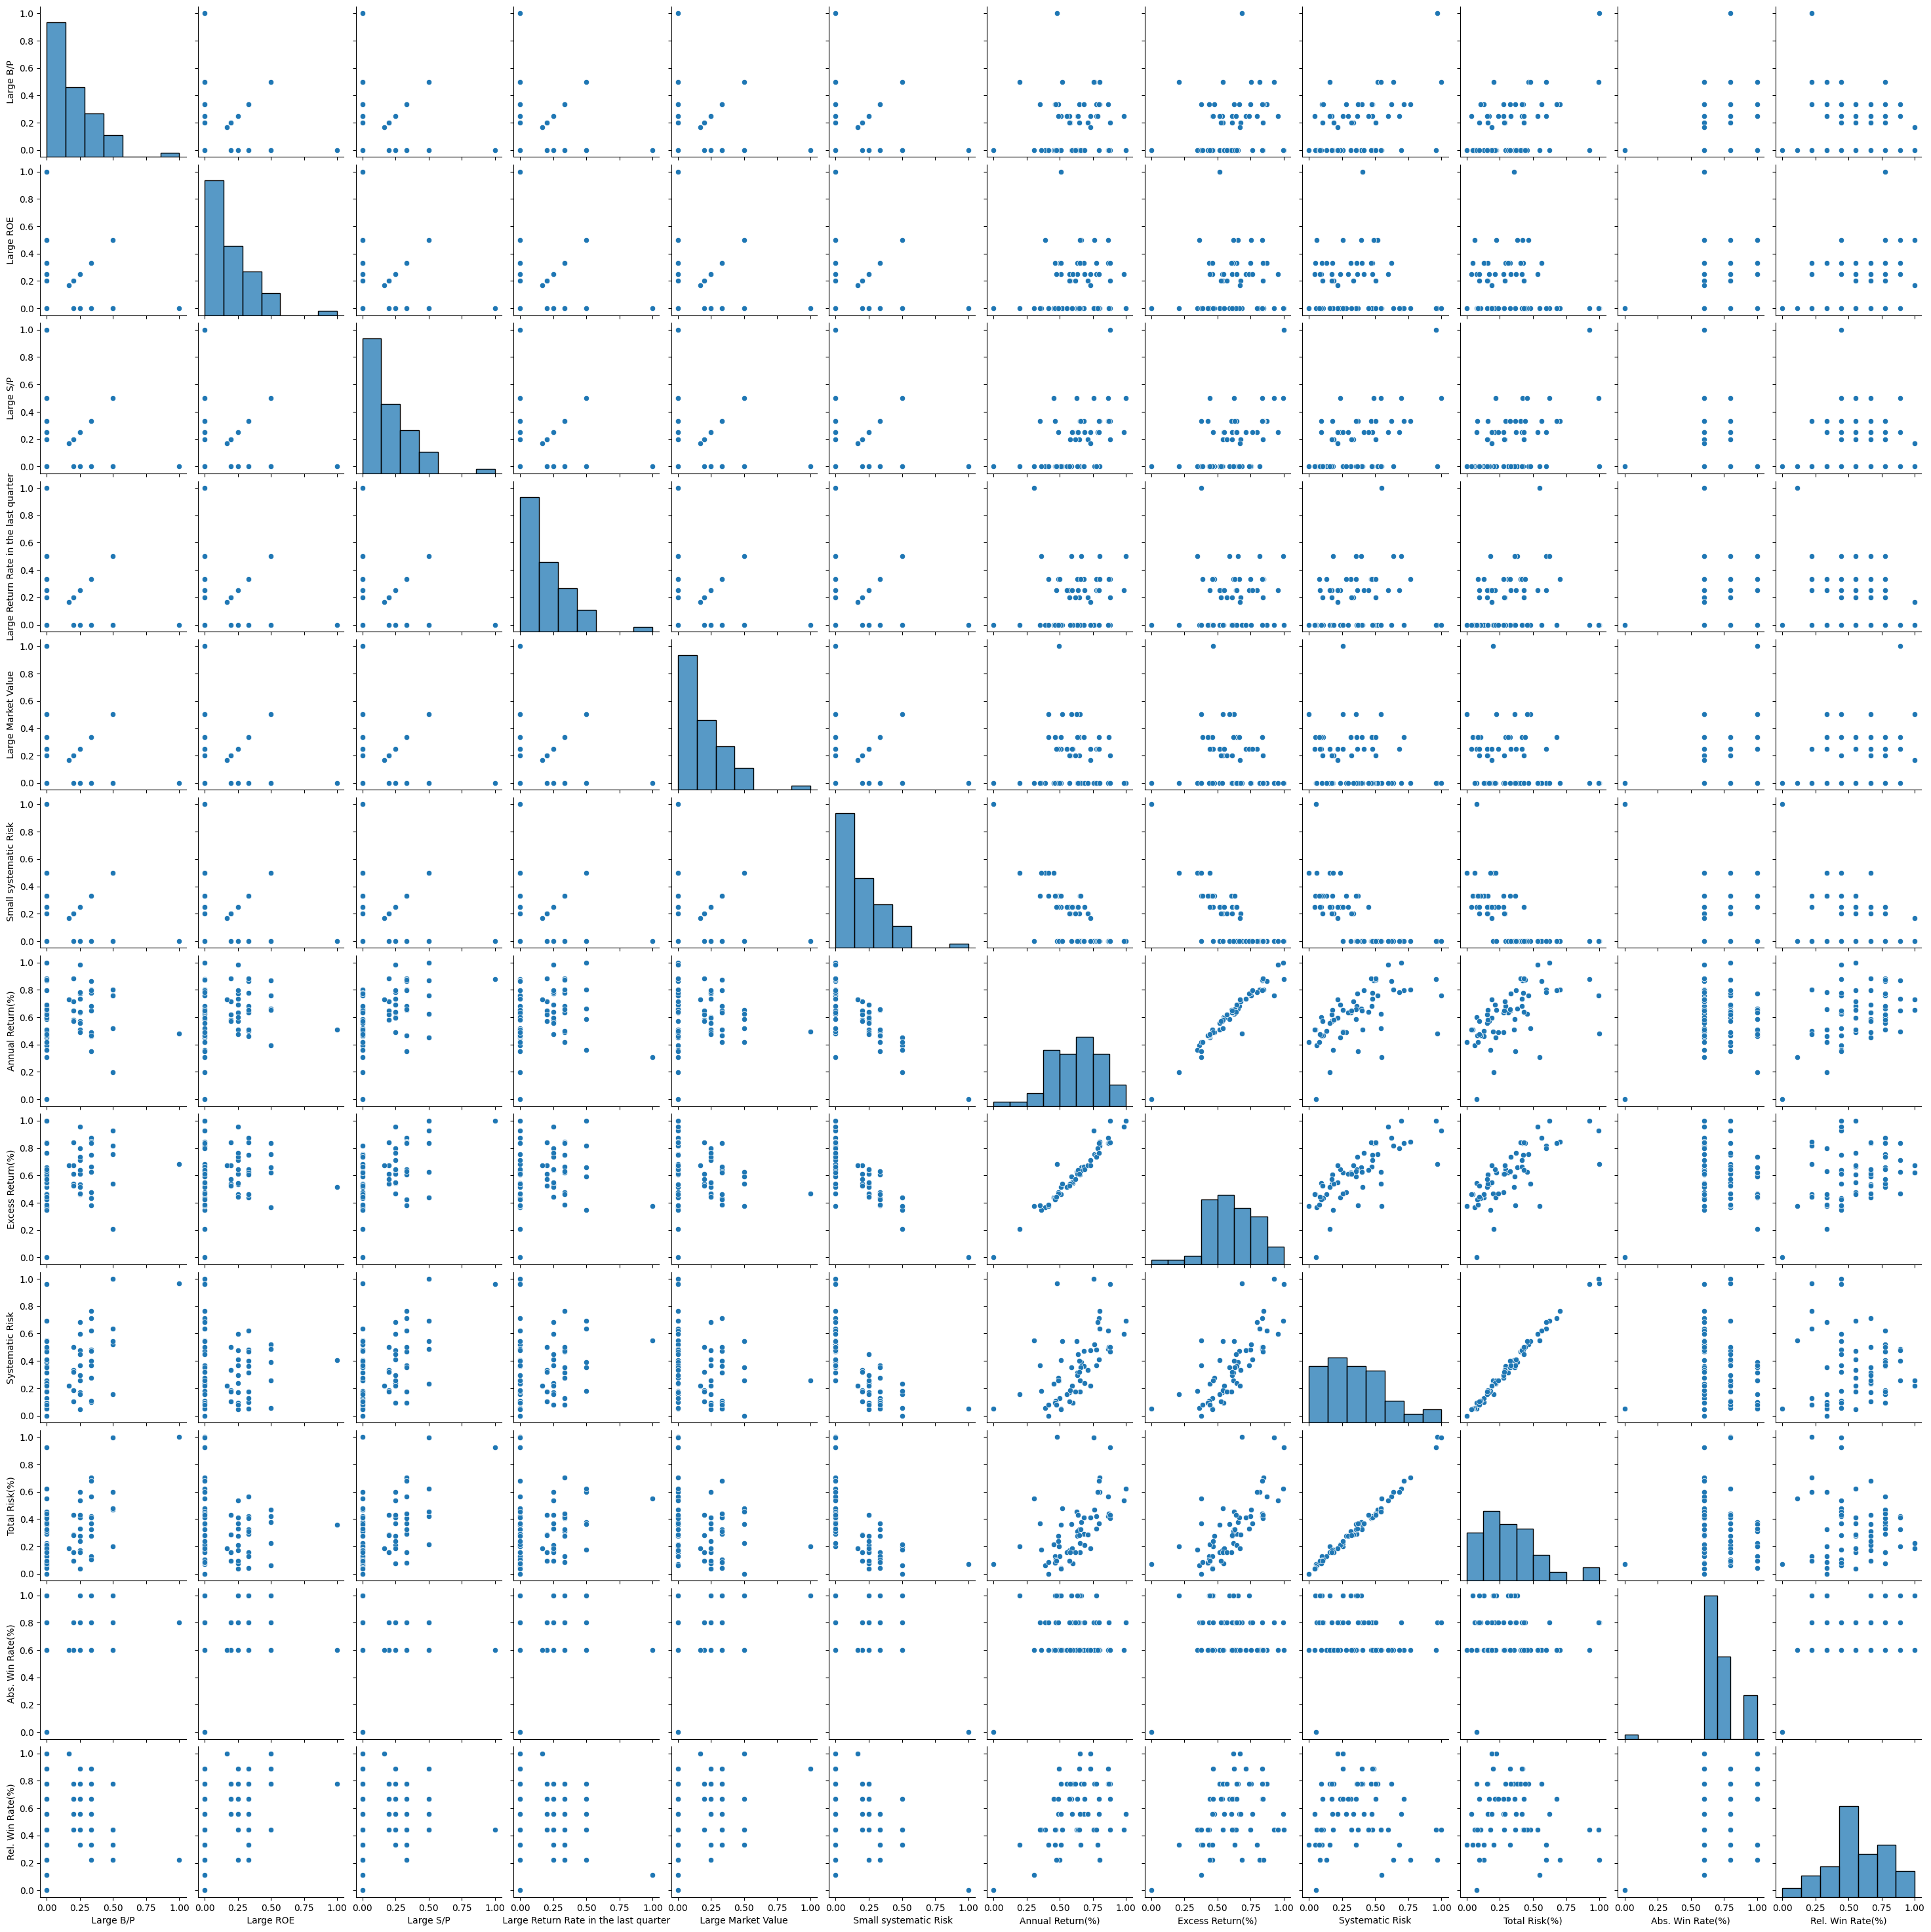

In [ ]:
#Show pairplot to find relation between
normalized_dataset = normalized_dataset.drop(columns=['ID'], errors='ignore')
sns.pairplot(data=normalized_dataset, vars=normalized_dataset.columns)
plt.show()

The pair plot provides a view of the relationships between the continuous and categorical variables in the dataset. The diagonal histograms highlight the distribution of continuous variables, showing variations in risk, return, and performance metrics. Some distributions are skewed, suggesting asymmetry in the data, while others indicate multimodal patterns, possibly driven by the influence of categorical variables like stock-picking concepts. Scatterplots reveal both linear and non-linear relationships between variables, with tighter clustering indicating strong correlations and more scattered plots suggesting weaker associations. Additionally, the relationships between risk metrics (e.g., systematic or total risk) and performance indicators (e.g., annual or excess returns) highlight trade-offs that investors may face.For example, stocks with higher systematic risk (e.g., volatile sectors) may offer higher annual or excess returns, but they are also more vulnerable to market downturns. Overall, the pair plot illustrates how categorical variables can influence the interaction between continuous variables, providing valuable insights into the dynamics of portfolio performance.




############# Correlation Heatmap##############





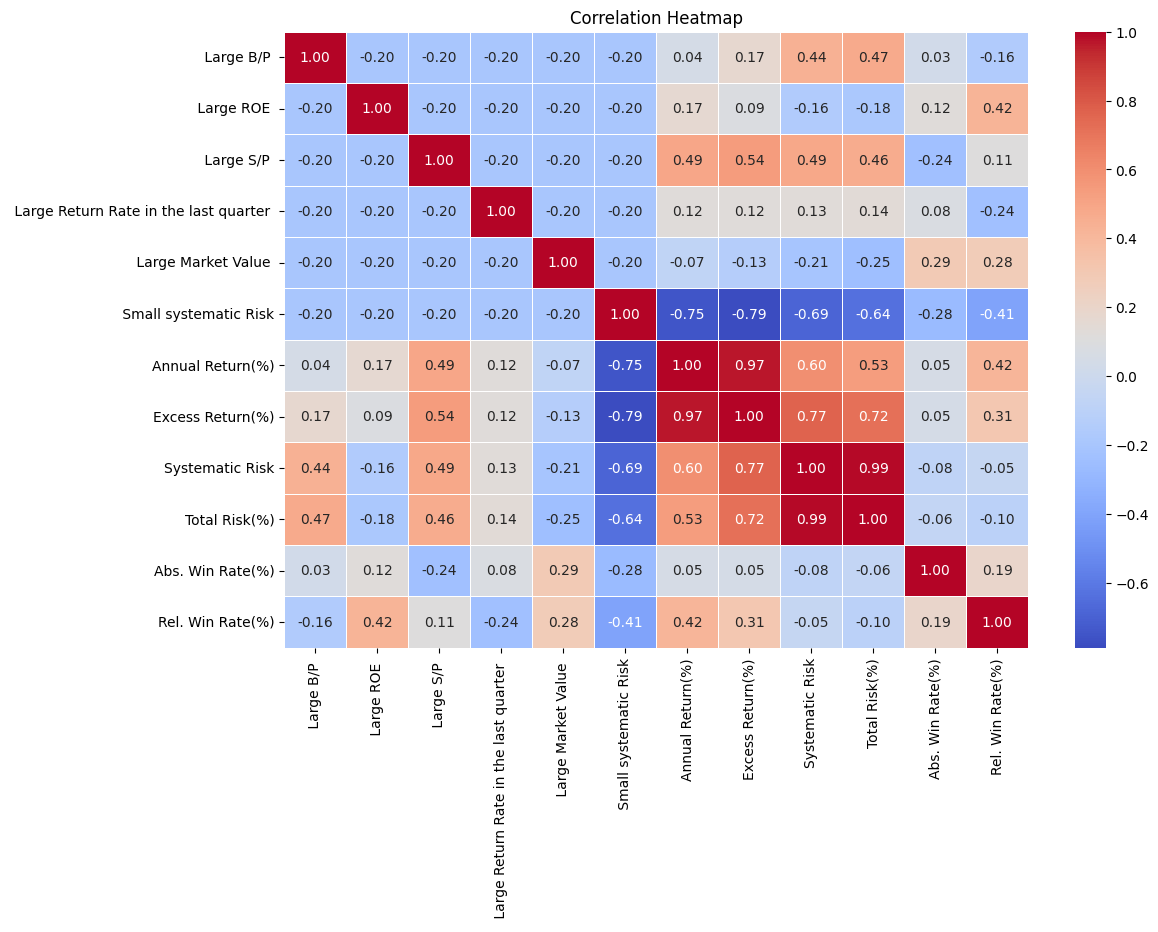

In [ ]:
print("\n\n\n############# Correlation Heatmap##############\n\n\n")

plt.figure(figsize=(12, 8))
correlation_matrix = normalized_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

There is a high positive relationship between Excess Rrturn and the targeted variable Annual return. Performance indicator like Excess Return always highlight the trade-off which means stock with high Excess return can be highly profitable but it can be more vulnerable to market downturns. The other positive relation with the targeted variables are Systematic Risk,Total Risk, Relative Win Rate and Large S/P, since those have the weakly positive correlation with the targated variable. I am going to excluded rest of the variables as some variable has very weak relation and some has negative relation as well.  

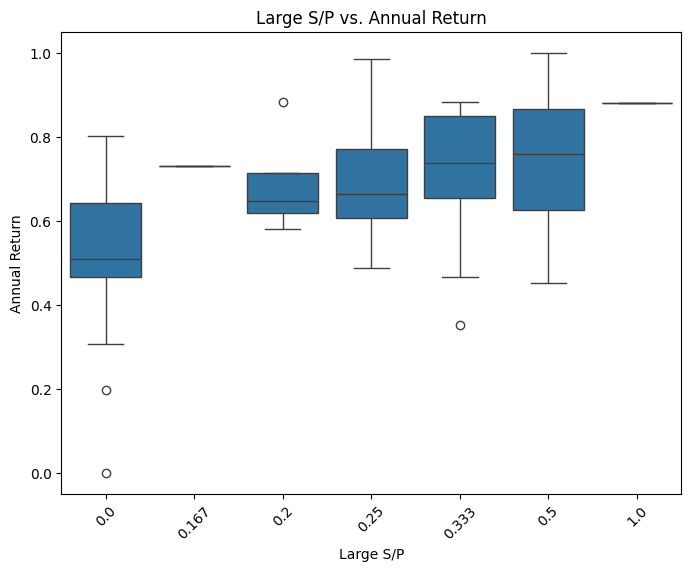

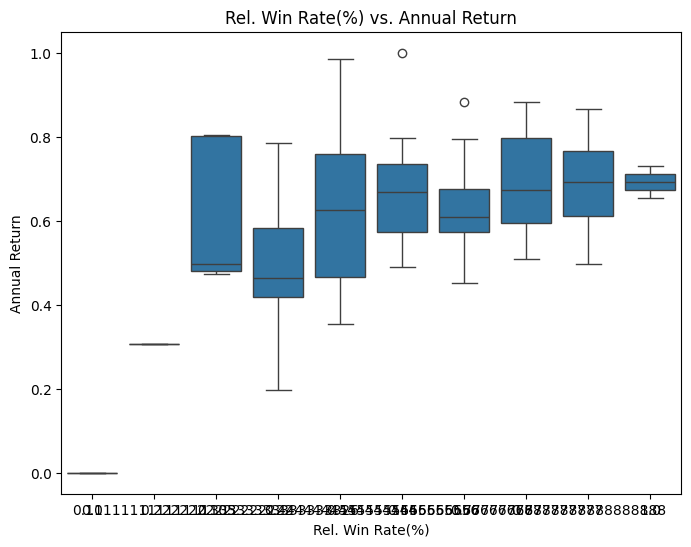

In [ ]:
#Check boxplot for Annual Return
normalized_dataset.columns = normalized_dataset.columns.str.strip()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Large S/P', y='Annual Return(%)', data=normalized_dataset)
plt.title('Large S/P vs. Annual Return')
plt.xlabel('Large S/P')
plt.ylabel('Annual Return')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Rel. Win Rate(%)', y='Annual Return(%)', data=normalized_dataset)
plt.title('Rel. Win Rate(%) vs. Annual Return')
plt.xlabel('Rel. Win Rate(%)')
plt.ylabel('Annual Return')
plt.show()

In this boxplot, It can be seen outliers for both Large S/P and Rel. Win Rate(%).  Higher values of these indicators seem to correspond to better performance, with increased stability and fewer outliers.

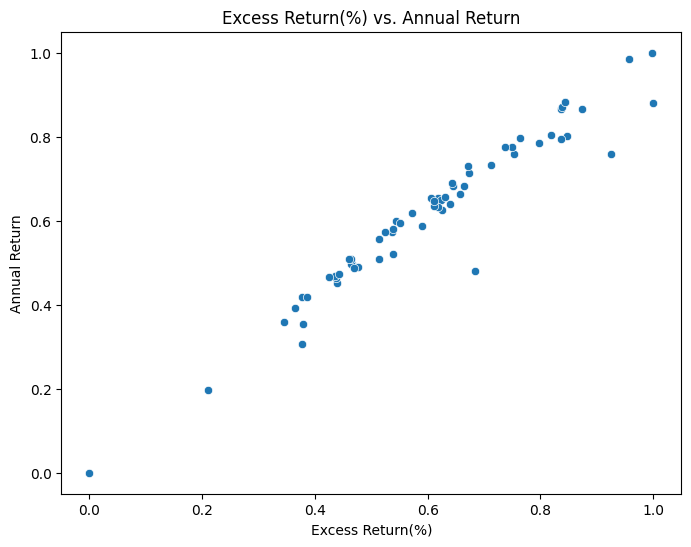

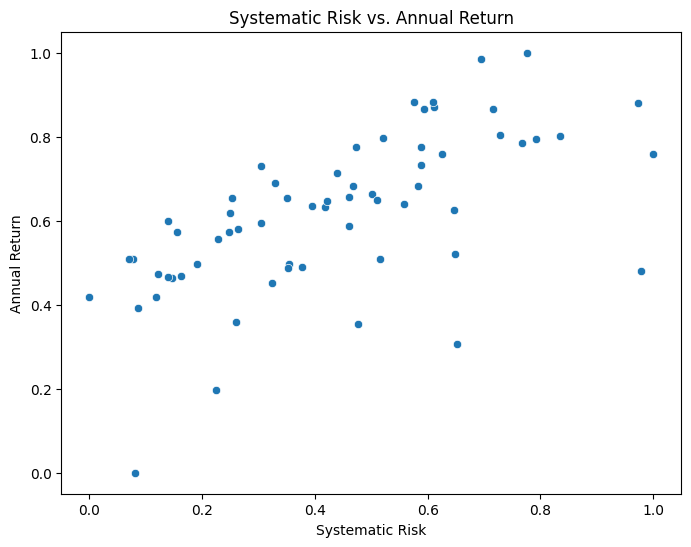

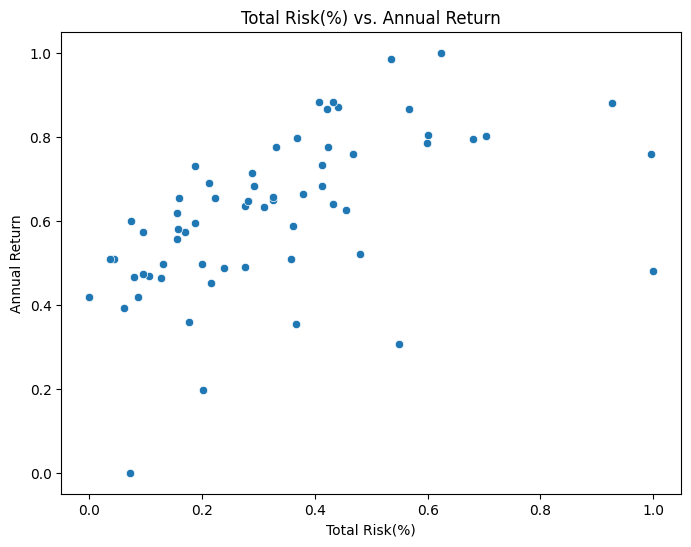

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Excess Return(%)', y='Annual Return(%)', data=normalized_dataset)
plt.title('Excess Return(%) vs. Annual Return')
plt.xlabel('Excess Return(%)')
plt.ylabel('Annual Return')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Systematic Risk', y='Annual Return(%)', data=normalized_dataset)
plt.title('Systematic Risk vs. Annual Return')
plt.xlabel('Systematic Risk')
plt.ylabel('Annual Return')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Risk(%)', y='Annual Return(%)', data=normalized_dataset)
plt.title('Total Risk(%) vs. Annual Return')
plt.xlabel('Total Risk(%)')
plt.ylabel('Annual Return')
plt.show()

In [ ]:
#Handle Outliers for the Features using IQR
outliers = pd.DataFrame()

for(Large_SP,Excess_Return,Systematic_Risk,Total_Risk,Rel_Win_Rate), group_data in normalized_dataset.groupby(['Large S/P', 'Excess Return(%)','Systematic Risk','Total Risk(%)','Rel. Win Rate(%)']):
  Q1 = group_data['Annual Return(%)'].quantile(0.25)
  Q3 = group_data['Annual Return(%)'].quantile(0.75)

  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  outliers_groupby = group_data[(group_data['Annual Return(%)'] < lower)| (group_data['Annual Return(%)'] < upper)]

  outliers = pd.concat([outliers, outliers_groupby])

print(outliers)

#Remove outliers
normalized_dataset = normalized_dataset[~normalized_dataset.index.isin(outliers.index)]
normalized_dataset

Empty DataFrame
Columns: [Large B/P, Large ROE, Large S/P, Large Return Rate in the last quarter, Large Market Value, Small systematic Risk, Annual Return(%), Excess Return(%), Systematic Risk, Total Risk(%), Abs. Win Rate(%), Rel. Win Rate(%), z_score]
Index: []


,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return(%),Excess Return(%),Systematic Risk,Total Risk(%),Abs. Win Rate(%),Rel. Win Rate(%),z_score
0,1.000,0.000,0.000,0.000,0.000,0.000,0.480237,0.683575,0.967926,1.000000,0.8,0.222222,-0.742745
1,0.000,1.000,0.000,0.000,0.000,0.000,0.508564,0.514493,0.406293,0.356938,0.6,0.777778,-0.589815
2,0.000,0.000,1.000,0.000,0.000,0.000,0.880764,1.000000,0.960662,0.926323,0.6,0.444444,1.419610
3,0.000,0.000,0.000,1.000,0.000,0.000,0.307642,0.376812,0.548754,0.548641,0.6,0.111111,-1.674549
4,0.000,0.000,0.000,0.000,1.000,0.000,0.496706,0.466184,0.258086,0.199571,1.0,0.888889,-0.653832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.200,0.200,0.200,0.000,0.200,0.200,0.580369,0.538647,0.184462,0.157368,0.6,0.777778,-0.202156
59,0.200,0.200,0.000,0.200,0.200,0.200,0.573781,0.524155,0.103355,0.094421,0.8,0.666667,-0.237721
60,0.200,0.000,0.200,0.200,0.200,0.200,0.647563,0.611111,0.318086,0.281831,0.6,0.444444,0.160607
61,0.000,0.200,0.200,0.200,0.200,0.200,0.618577,0.572464,0.173588,0.155937,0.8,0.777778,0.004121


In [ ]:
from scipy.stats import zscore

normalized_dataset['Annual Return Z-Score'] = zscore(normalized_dataset['Annual Return(%)'])
filtered_data = normalized_dataset[(normalized_dataset['Annual Return Z-Score'].abs() <= 2) &(normalized_dataset['Annual Return Z-Score'].abs() >= -2)]
filtered_data.head()


,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return(%),Excess Return(%),Systematic Risk,Total Risk(%),Abs. Win Rate(%),Rel. Win Rate(%),z_score,Annual Return Z-Score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.480237,0.683575,0.967926,1.000000,0.8,0.222222,-0.742745,-0.742745
1,0.0,1.0,0.0,0.0,0.0,0.0,0.508564,0.514493,0.406293,0.356938,0.6,0.777778,-0.589815,-0.589815
2,0.0,0.0,1.0,0.0,0.0,0.0,0.880764,1.000000,0.960662,0.926323,0.6,0.444444,1.419610,1.419610
3,0.0,0.0,0.0,1.0,0.0,0.0,0.307642,0.376812,0.548754,0.548641,0.6,0.111111,-1.674549,-1.674549
4,0.0,0.0,0.0,0.0,1.0,0.0,0.496706,0.466184,0.258086,0.199571,1.0,0.888889,-0.653832,-0.653832


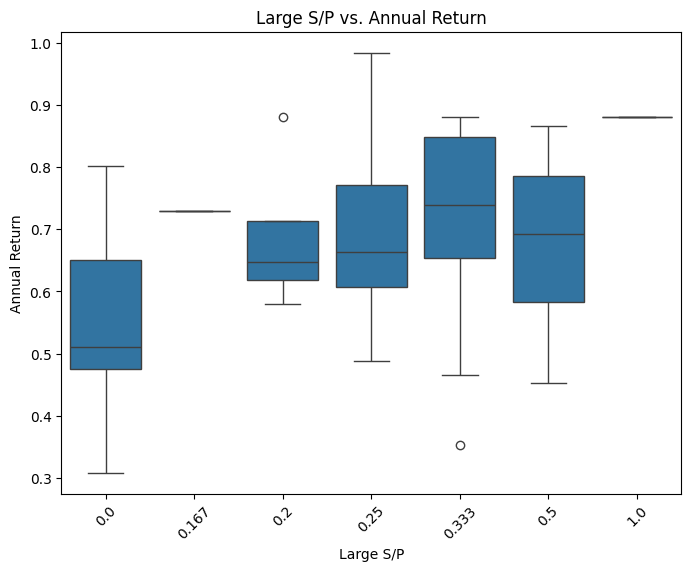

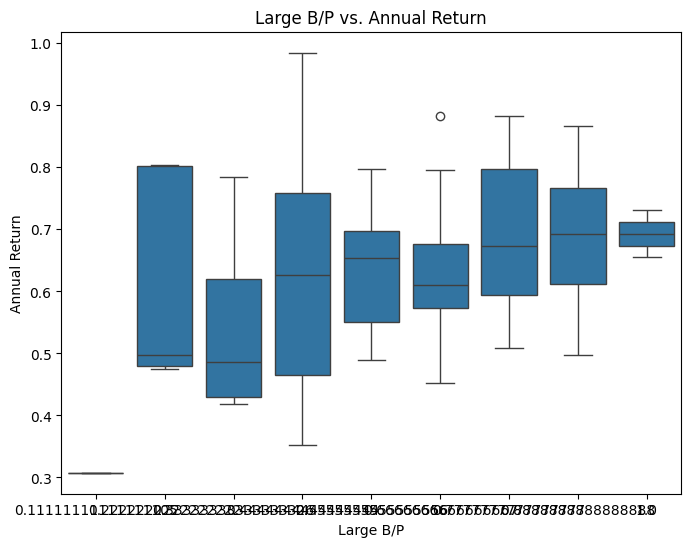

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Large S/P', y='Annual Return(%)', data=filtered_data)
plt.title('Large S/P vs. Annual Return')
plt.xlabel('Large S/P')
plt.ylabel('Annual Return')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Rel. Win Rate(%)', y='Annual Return(%)', data=filtered_data)
plt.title('Large B/P vs. Annual Return')
plt.xlabel('Large B/P')
plt.ylabel('Annual Return')
plt.show()

From z-score technique, I have exluded some extreme values that considers as outliers. In this graph some outliers bas been exluded and now have fewer extreme values than before.

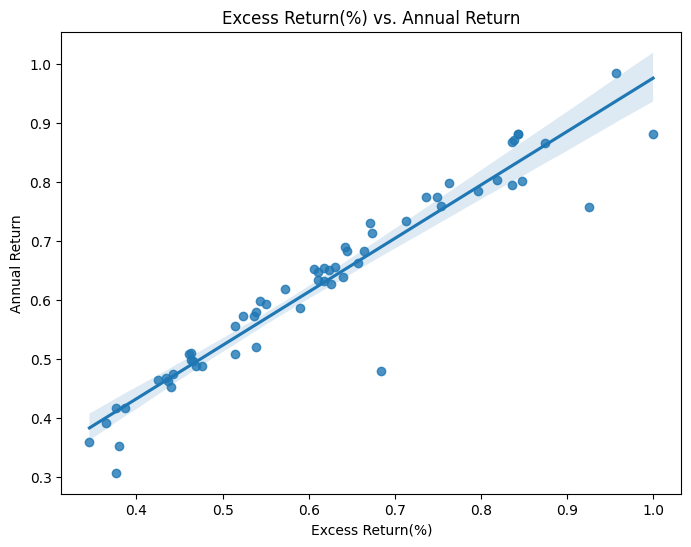

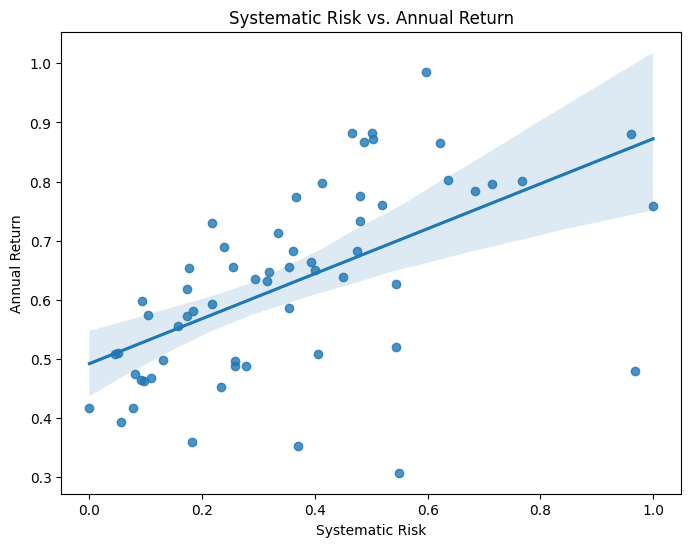

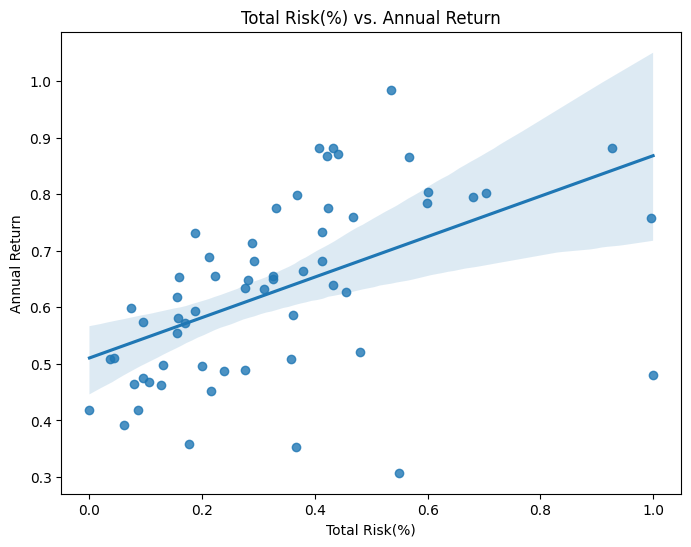

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Excess Return(%)', y='Annual Return(%)', data=filtered_data)
plt.title('Excess Return(%) vs. Annual Return')
plt.xlabel('Excess Return(%)')
plt.ylabel('Annual Return')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='Systematic Risk', y='Annual Return(%)', data=filtered_data)
plt.title('Systematic Risk vs. Annual Return')
plt.xlabel('Systematic Risk')
plt.ylabel('Annual Return')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='Total Risk(%)', y='Annual Return(%)', data=filtered_data)
plt.title('Total Risk(%) vs. Annual Return')
plt.xlabel('Total Risk(%)')
plt.ylabel('Annual Return')
plt.show()

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Define the features and target
X = filtered_data.drop(columns=["Large B/P","Large ROE","Large Return Rate in the last quarter","Large Market Value","Small systematic Risk","Annual Return(%)","Abs. Win Rate(%)"])
y = filtered_data["Annual Return(%)"]

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
#########Train Model #########
lr_model = LinearRegression()

#########Validate Model With K-Fold Cross Validation########
cv_score = KFold(n_splits=10, shuffle=True, random_state=42)

#Score List

kfold_mae = []
kfold_mse = []
kfold_r_squared = []

kfold_mae_train = []
kfold_mse_train = []
kfold_r_squared_train = []


#Perform K-Fold Cross Validation
for train_index, test_index in cv_score.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    lr_model.fit(X_train, y_train)

    train_pred = lr_model.predict(X_train)
    lr_mae_train = mean_absolute_error(y_train, train_pred)
    lr_mse_train = mean_squared_error(y_train, train_pred)
    lr_r2_train = r2_score(y_train, train_pred)

    ######## Make Prediction #############
    y_pred = lr_model.predict(X_test)

    print("\n############# Model Evaluation ##############\n\n")
    lr_mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE: {lr_mae}")

    lr_mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {lr_mse}")

    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")

    ####### Store All the Score #########

    kfold_mae.append(lr_mae)
    kfold_mse.append(lr_mse)
    kfold_r_squared.append(r2)

    ######Store Train Score#########
    kfold_mae_train.append(lr_mae_train)
    kfold_mse_train.append(lr_mse_train)
    kfold_r_squared_train.append(lr_r2_train)


############# Model Evaluation ##############


MAE: 1.295260195396016e-16
MSE: 1.8488927466117464e-32
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 1.2027416100105862e-16
MSE: 1.4893858236594623e-32
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 6.47630097698008e-17
MSE: 6.676557140542417e-33
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 9.251858538542972e-17
MSE: 9.244463733058732e-33
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 1.8503717077085943e-16
MSE: 3.697785493223493e-32
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 1.942890293094024e-16
MSE: 6.214333953889481e-32
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 2.1279274638648835e-16
MSE: 6.008901426488176e-32
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 1.8503717077085943e-16
MSE: 3.697785493223493e-32
R2 Score: 1.0

############# Model Evaluation ##############


MAE: 3.700

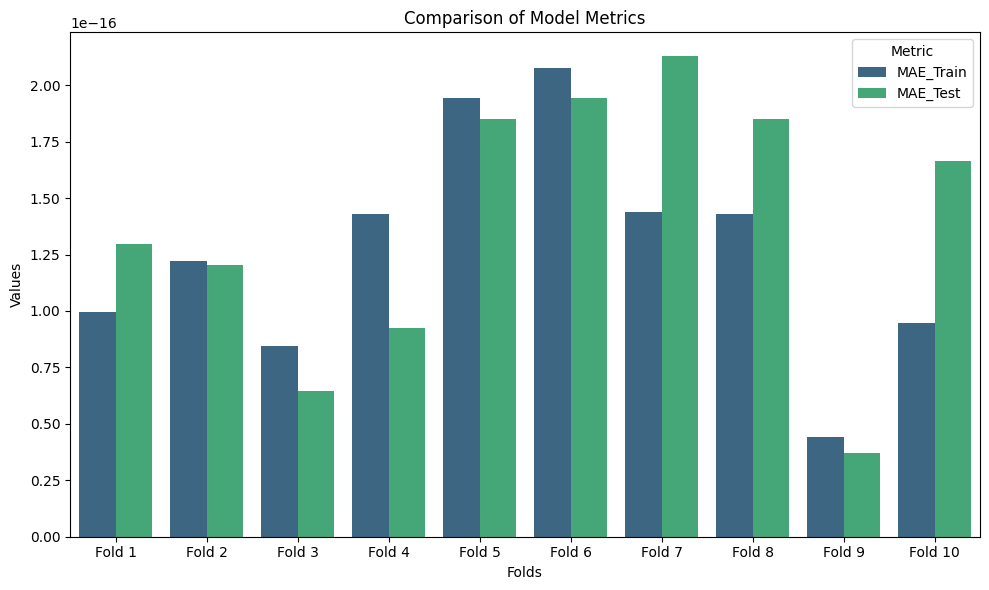

In [ ]:
#Bar chart for model evaluation matrix
MAE = {
    'Model': ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10'],
    'MAE_Train': kfold_mae_train,
    'MAE_Test': kfold_mae,
}
metric_df = pd.DataFrame(MAE)
metric_df

metrics_melted = metric_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
metrics_melted

# Create a multiple bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Model', y='Value', hue='Metric', palette='viridis')

# Add titles and labels
plt.title('Comparison of Model Metrics')
plt.ylabel('Values')
plt.xlabel('Folds')
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()

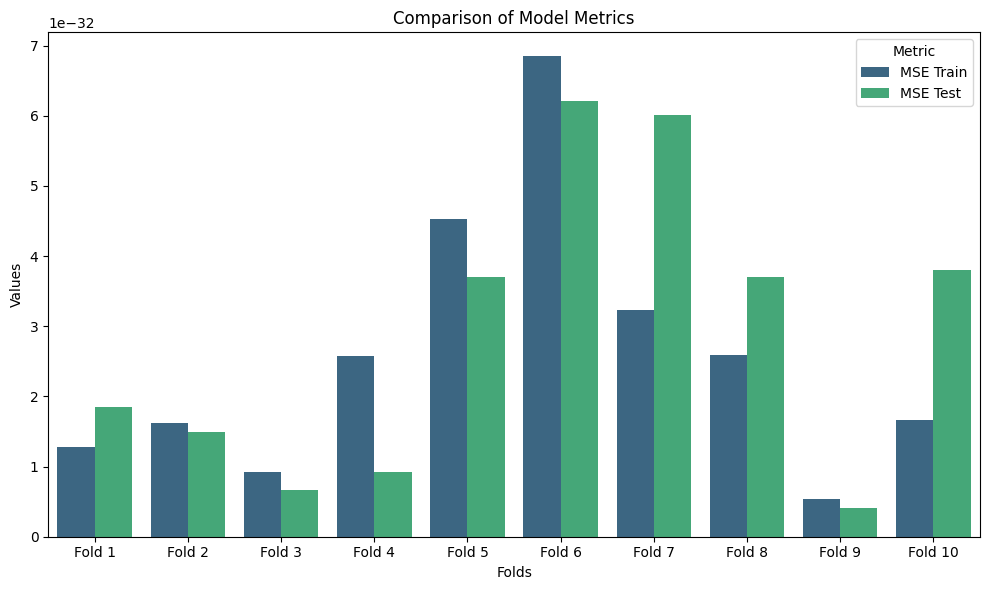

In [ ]:
#Bar chart for model evaluation matrix
MAE = {
    'Model': ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10'],
    'MSE Train': kfold_mse_train,
    'MSE Test': kfold_mse,
}
metric_df = pd.DataFrame(MAE)
metric_df

metrics_melted = metric_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
metrics_melted

# Create a multiple bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Model', y='Value', hue='Metric', palette='viridis')

# Add titles and labels
plt.title('Comparison of Model Metrics')
plt.ylabel('Values')
plt.xlabel('Folds')
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()

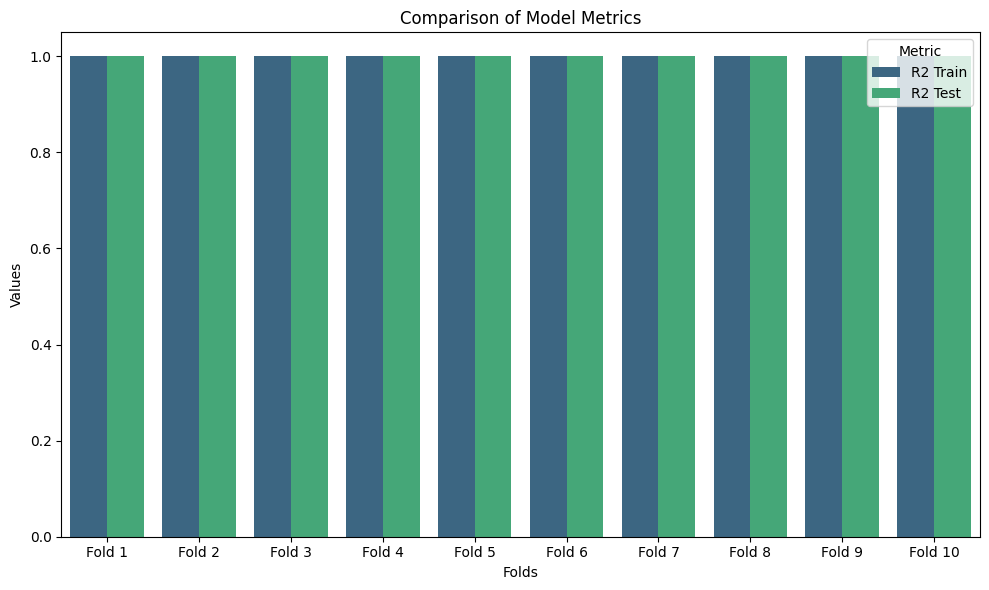

In [ ]:
#Bar chart for model evaluation matrix
R2 = {
    'Model': ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10'],
    'R2 Train': kfold_r_squared_train,
    'R2 Test': kfold_r_squared,
}
metric_df = pd.DataFrame(R2)
metric_df

metrics_melted = metric_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
metrics_melted

# Create a multiple bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Model', y='Value', hue='Metric', palette='viridis')

# Add titles and labels
plt.title('Comparison of Model Metrics')
plt.ylabel('Values')
plt.xlabel('Folds')
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()